### Plotting for Inferances

# O(2) - Model , J Engels et al PhyLettB 2000

In [7]:
# import ising_lib
# from imp import reload 
# reload(ising_lib)
from ising_lib import *
from numpy import *
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import *

## Analysis of Data

In [8]:
def variance(X):
    return var(X)
def Average(X):
    return average(X)
def analyze(temparature,L,E,M):
    en,en_err=jacknife(E,Average)
    mag,mag_err=jacknife(M,Average)
    sp_heat,sp_heat_err=jacknife(E,variance)
    sp_heat/=(temparature*temparature*L)
    sp_heat_err/=(temparature*temparature*L)
    sucep,sucep_err=jacknife(M,variance)
    sucep/=(temparature*L)
    sucep_err/=(temparature*L)
    return [mag,mag_err],[sp_heat,sp_heat_err],[sucep,sucep_err],[en,en_err]

def leniar_fn(x,a,b):
    return a*x+b

def quadratic_fn(x,a,b,c):
    return a*x*x+b*x+c

#### Reading the analysis file with offset mistake

In [12]:
def read_analyzed_data(fname):
        f=open(fname,'r')
        analysis_vals=dict()
        l=f.readline()
        item_list=l[1:-1].split(',')
        the_dict={it:[] for it in item_list}
        l=f.readline()
        i=0
        while l:
            if l[0]=='#':
                l=f.readline()
                continue
            i+=1
            try:
                it=l[:-1].split(',')
        #         print(it)
                L=float(it[1])
                J=float(it[4])
                H0=float(it[5])
                if L not in analysis_vals.keys():
                    analysis_vals.update({L:dict()})
                if J not in analysis_vals[L].keys():
                    analysis_vals[L].update({J:dict()})
                if H0 not in analysis_vals[L][J].keys():
                    analysis_vals[L][J].update({H0:dict(the_dict)})
                for val,end_key in zip(it,item_list):
                    analysis_vals[L][J][H0][end_key]=float(val)
                l=f.readline()
            except:
                print(it)
                l=f.readline()
        f.close()
        print(i ," DATA LINES READ")
        return analysis_vals

In [13]:
analysis=read_analyzed_data('../extracted_data/GS_analysis/analysis.txt')

225  DATA LINES READ


In [92]:
for L in analysis.keys():
    for J in analysis[L].keys():
        for H0 in analysis[L][J].keys():
            if L not in offsets.keys():
                print(L ," not in off_keys")
                continue
            if J not in offsets[L].keys():
                print(J ," not in off_keys of ",L)
                continue
            if H0 not in offsets[L][J].keys():
                print(H0 ," not in off_keys of ",L , J)
                continue
            analysis[L][J][H0]['M0']+=offset_vals[L][J][H0]['M0']/(L**3)
            analysis[L][J][H0]['M1']+=offset_vals[L][J][H0]['M1']/(L**3)
            analysis[L][J][H0]['M']=sqrt(analysis[L][J][H0]['M0']**2 +analysis[L][J][H0]['M1']**2)

In [10]:
analyzed_vals=read_analyzed_data('../extracted_data/GS_analysis/analysis_full.txt')

390  DATA LINES READ


In [14]:
analyzed_vals=read_analyzed_data('../extracted_data/GS_analysis/raw_anaysis')

[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', '

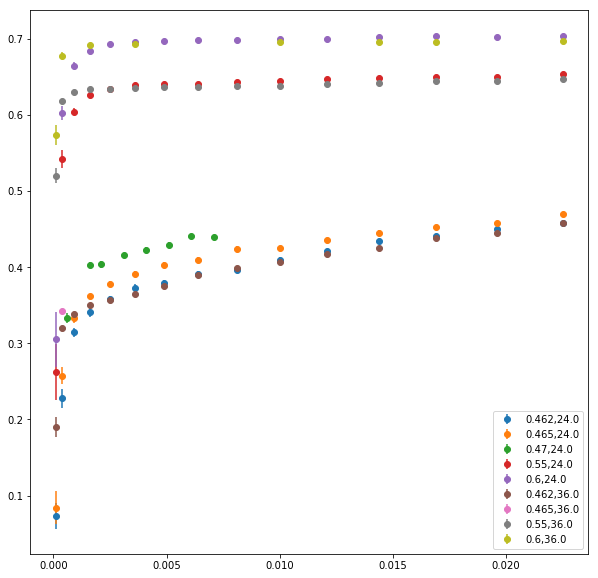

In [21]:
plt.figure(figsize=(10,10))
i=0
X_fit=[]
Y_fit=[]
for L in analyzed_vals.keys():
    if L!=36 and L!=24:
        continue
    for J in analyzed_vals[L].keys():
        if J<0.454165:
            continue
        X=[]
        Y=[]
        Y_err=[]
        for H0 in analyzed_vals[L][J].keys():
            X.append(H0)
            Y.append(analyzed_vals[L][J][H0]['M0'])
            Y_err.append(analyzed_vals[L][J][H0]['M0_err']*30)
        for i in X:
            X_fit.append(i)
        for i in Y:
            Y_fit.append(i)
        i+=1
        plt.errorbar(X,Y,Y_err,fmt='o',label=str(J)+','+str(L)) 
#         plt.xlim([0,0.16]) 
plt.legend(loc=0)

##### Fitting the leniar functions for various   J values

M0 =  0.6860412753792693  +/-  0.0023637557410146376


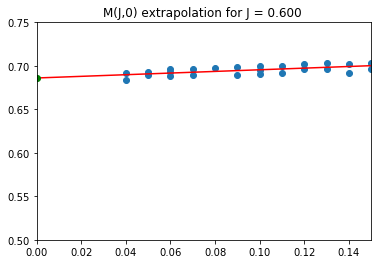

In [65]:
Xt,Yt=[],[]
for i,j in zip(X_fit,Y_fit):
    if i<0.04:
        continue    
    if j<0.62:
        continue
    Xt.append(i)
    Yt.append(j)
val,err=curve_fit(leniar_fn,Xt,Yt)
x=linspace(0,max(Xt),100)
y=[i*val[0]+val[1] for i in x]
print('M0 = ',val[1]," +/- ",sqrt(err[1][1]))
plt.plot(x,y,c='r')
plt.scatter(Xt,Yt)
plt.errorbar([0],[val[1]],[sqrt(err[1][1])],fmt='o',c='g')
plt.xlim([0,max(Xt)])
plt.ylim([0.5,0.75])
plt.title('M(J,0) extrapolation for J = 0.600 ')

M0 =  0.6273247010908495  +/-  0.0009590379872470557


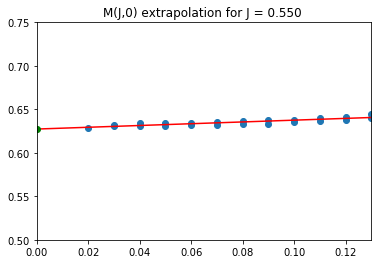

In [69]:
Xt,Yt=[],[]
for i,j in zip(X_fit,Y_fit):
    if i<0.02:
        continue    
    if i>0.13:
        continue
    if j<0.62:
        continue
    Xt.append(i)
    Yt.append(j)
val,err=curve_fit(leniar_fn,Xt,Yt)
x=linspace(0,max(Xt),100)
y=[i*val[0]+val[1] for i in x]
print('M0 = ',val[1]," +/- ",sqrt(err[1][1]))
plt.plot(x,y,c='r')
plt.scatter(Xt,Yt)
plt.errorbar([0],[val[1]],[sqrt(err[1][1])],fmt='o',c='g')
plt.xlim([0,max(Xt)])
plt.ylim([0.5,0.75])
plt.title('M(J,0) extrapolation for J = 0.550 ')

M0 =  0.3261050151008733  +/-  0.004099961462634835


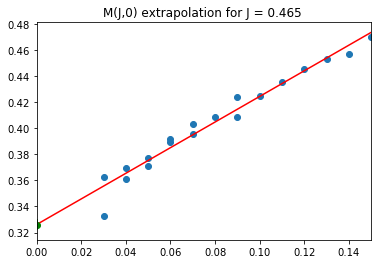

In [41]:
Xt,Yt=[],[]
for i,j in zip(X_fit,Y_fit):
    if i<0.022:
        continue    
    if i>0.16:
        continue
    Xt.append(i)
    Yt.append(j)
val,err=curve_fit(leniar_fn,Xt,Yt)
x=linspace(0,max(Xt),100)
y=[i*val[0]+val[1] for i in x]
print('M0 = ',val[1]," +/- ",sqrt(err[1][1]))
plt.plot(x,y,c='r')
plt.scatter(Xt,Yt)
plt.errorbar([0],[val[1]],[sqrt(err[1][1])],fmt='o',c='g')
plt.xlim([0,max(Xt)])
plt.ylim([0.25,0.45])
plt.title('M(J,0) extrapolation for J = 0.465 ')

M0 =  0.29387394328190336  +/-  0.005546007302509923


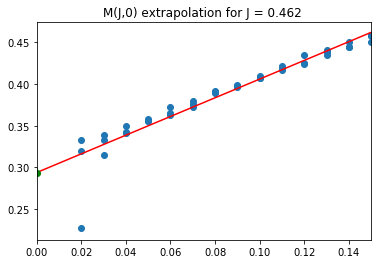

In [31]:
Xt,Yt=[],[]
for i,j in zip(X_fit,Y_fit):
    if i<0.02:
        continue    
    if i>0.19:
        continue
    Xt.append(i)
    Yt.append(j)
val,err=curve_fit(leniar_fn,Xt,Yt)
x=linspace(0,max(Xt),100)
y=[i*val[0]+val[1] for i in x]
print('M0 = ',val[1]," +/- ",sqrt(err[1][1]))
plt.plot(x,y,c='r')
plt.scatter(Xt,Yt)
plt.errorbar([0],[val[1]],[sqrt(err[1][1])],fmt='o',c='g')
plt.xlim([0,max(Xt)])
plt.title('M(J,0) extrapolation for J = 0.462 ')

M0 =  0.36721995863284734  +/-  0.003181246150092891


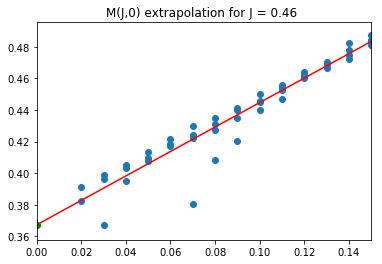

In [193]:
Xt,Yt=[],[]
for i,j in zip(X_fit,Y_fit):
    if i<0.02:
        continue
    if j<0.36:
        continue
    if i==0.07 and j<0.4:
        continue
    Xt.append(i)
    Yt.append(j)
val,err=curve_fit(leniar_fn,Xt,Yt)
x=linspace(0,max(Xt),100)
y=[i*val[0]+val[1] for i in x]
print('M0 = ',val[1]," +/- ",sqrt(err[1][1]))
plt.plot(x,y,c='r')
plt.scatter(Xt,Yt)
plt.errorbar([0],[val[1]],[sqrt(err[1][1])],fmt='o',c='g')
plt.xlim([0,max(Xt)])
plt.title('M(J,0) extrapolation for J = 0.47 ')

M0 =  0.27738288111875886  +/-  0.004947944338430102


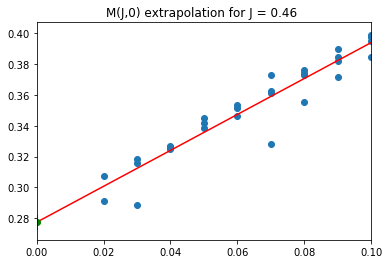

In [176]:
Xt,Yt=[],[]
for i,j in zip(X_fit,Y_fit):
    if i<0.02:
        continue
    if i>0.1:
        continue
    if j<0.25:
        continue
    if i==0.02 and j<0.21:
        continue
    if i==0.06 and j<0.3:
        continue
    Xt.append(i)
    Yt.append(j)
val,err=curve_fit(leniar_fn,Xt,Yt)
x=linspace(0,max(Xt),100)
y=[i*val[0]+val[1] for i in x]
print('M0 = ',val[1]," +/- ",sqrt(err[1][1]))
plt.plot(x,y,c='r')
plt.scatter(Xt,Yt)
plt.errorbar([0],[val[1]],[sqrt(err[1][1])],fmt='o',c='g')
plt.xlim([0,max(Xt)])
plt.title('M(J,0) extrapolation for J = 0.46 ')

M0 =  0.5147435540773019  +/-  0.0018245356657172486


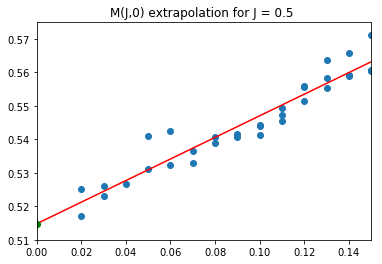

In [166]:
Xt,Yt=[],[]
for i,j in zip(X_fit,Y_fit):
    if i<0.02:
        continue
    if j<0.51:
        continue
    if i==0.08 and j<0.53:
        continue
    if i==0.09 and j<0.53:
        continue
    Xt.append(i)
    Yt.append(j)
val,err=curve_fit(leniar_fn,Xt,Yt)
x=linspace(0,max(Xt),100)
y=[i*val[0]+val[1] for i in x]
print('M0 = ',val[1]," +/- ",sqrt(err[1][1]))
plt.plot(x,y,c='r')
plt.scatter(Xt,Yt)
plt.errorbar([0],[val[1]],[sqrt(err[1][1])],fmt='o',c='g')
plt.xlim([0,max(Xt)])
plt.title('M(J,0) extrapolation for J = 0.5 ')

## M(T,0) near Tc

In [1]:
f=open('../extracted_data/GS_analysis/J_vs_M0','r')
l=f.readline()
J,M0,M0_err=[],[],[]
while l:
    it=l[:-1].split(',')
    j=float(it[0])
    if j==0.46:
        print("cont")
        l=f.readline()
        continue
    J.append(j)
    M0.append(float(it[1]))
    M0_err.append(float(it[2]))
    l=f.readline()

cont


In [113]:
w=0.79
v=0.6723
bet=0.3490
def fn_to_fit(dt,B,b1,b2):
    dt=abs(dt)
    return B*(dt)**bet * ( 1+b1* dt**(w*v) + b2*dt )


B =  0.9222793152230713 +/- 0.00990326903146225
b1 =  0.022825717470154095 +/- 0.05551852416094022
b2 =  -0.16911084128195183 +/- 0.05880011110224168


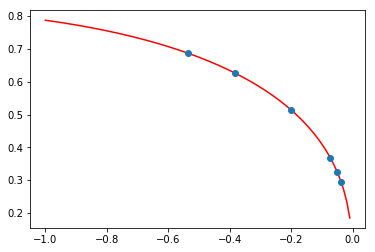

In [114]:
Tc=1/0.454165
dt=[1/i-Tc for i in J]
plt.errorbar(dt,M0,M0_err,fmt='o')
val,err=curve_fit(fn_to_fit,dt,M0)
print("B = ",val[0],"+/-",sqrt(err[0][0]) )
print("b1 = ",val[1],"+/-",sqrt(err[1][1]) )
print("b2 = ",val[2],"+/-",sqrt(err[2][2]) )
x=linspace(-1,-0.01,100)
y=[fn_to_fit(i,val[0],val[1],val[2]) for i in x]
plt.plot(x,y,c='r')

## Magnetization at Tc for diminishing H

In [24]:
analyzed_vals=read_analyzed_data('../extracted_data/GS_analysis/analysis_Mtc')

45  DATA LINES READ


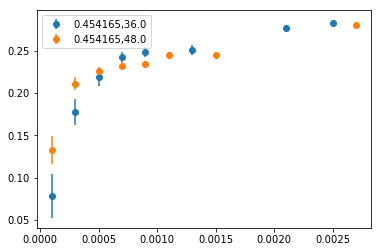

In [34]:
i=0
X_fit=[]
Y_fit=[]
Y_err_fit=[]
for L in analyzed_vals.keys():
    for J in analyzed_vals[L].keys():
        X=[]
        Y=[]
        Y_err=[]
        for H0 in analyzed_vals[L][J].keys():
            X.append((H0))
            Y.append(analyzed_vals[L][J][H0]['M0'])
            Y_err.append(analyzed_vals[L][J][H0]['M0_err']*30)
        for i,j,k in zip(X,Y,Y_err):
            X_fit.append(i)
            Y_fit.append(j)
            Y_err_fit.append(k)
        plt.errorbar(X,Y,Y_err,fmt='o',label=str(J)+','+str(L)) 
#         plt.xlim([0,0.06]) 
plt.legend(loc=0)

In [50]:
w=0.79
nu=0.6723
beta=0.34490
delta=3*nu/beta - 1
vc=nu/(beta*delta)
print(delta)
def Mtc_fit_fn(H,dc,dc1):
    return dc*H**(1/delta) *(1+ dc1* H**(w*vc))

4.847781965787186


dc =  0.8396926152523688 +/- 0.16239169670170625
dc1 =  1.8852045682357264 +/- 2.24833956353187


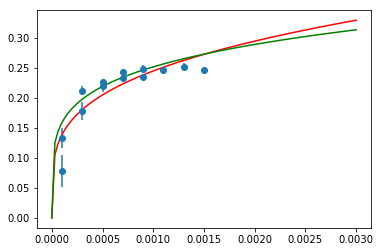

In [53]:
X_fit2=[]
Y_fit2=[]
Y_err_fit2=[]
for i,j,k in zip(X_fit,Y_fit,Y_err_fit):
    if i>0.0015:
        continue
    X_fit2.append(i)
    Y_fit2.append(j)
    Y_err_fit2.append(k)
plt.errorbar(X_fit2,Y_fit2,Y_err_fit2,fmt='o')
val,err=curve_fit(Mtc_fit_fn,X_fit2,Y_fit2)
print("dc = ",val[0],"+/-",sqrt(err[0][0]) )
print("dc1 = ",val[1],"+/-",sqrt(err[1][1]) )
x=linspace(0,0.003,100)
y=[Mtc_fit_fn(i,val[0],val[1]) for i in x]
plt.plot(x,y,c='r')
y=[i**(0.2) for i in x]
plt.plot(x,y,c='g')

## For T>Tc

In [18]:
analyzed_vals=read_analyzed_data('../extracted_data/GS_analysis/analysis_MT_greater')

60  DATA LINES READ


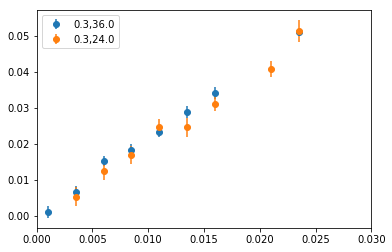

In [21]:
i=0
for L in analyzed_vals.keys():
    for J in analyzed_vals[L].keys():
        X=[]
        Y=[]
        Y_err=[]
        for H0 in analyzed_vals[L][J].keys():
            X.append((H0))
            Y.append(analyzed_vals[L][J][H0]['M0'])
            Y_err.append(analyzed_vals[L][J][H0]['M0_err']*30)
        plt.errorbar(X,Y,Y_err,fmt='o',label=str(J)+','+str(L)) 
        plt.xlim([0,0.03]) 
plt.legend(loc=0)

## Extration of Scaling Funtion

In [9]:
analyzed_vals=read_analyzed_data('../extracted_data/GS_analysis/analysis_scaling')
M,M_err,H,J=[],[],[],[]
for L in analyzed_vals.keys():
    for _J in analyzed_vals[L].keys():
        for H0 in analyzed_vals[L][_J].keys():
            M.append(analyzed_vals[L][_J][H0]['M0'])
            M_err.append(analyzed_vals[L][_J][H0]['M0_err'])
            J.append(_J)
            H.append(H0)
T=[1/i for i in J]
f=open('../extracted_data/GS_analysis/fit_raw_data','w')
f.write('#T,H,M,M_err\n')
for a,b,c,d in zip(T,H,M,M_err):
    f.write(str(a)+","+str(b)+","+str(c)+","+str(d)+'\n')
f.close()

T0=1.18
H0=1.11
Tc=1/0.454165
w=0.79
nu=0.6723
beta=0.34490
delta=3*nu/beta - 1
h1=[i/H0 for i in H]
t1=[(i-Tc)/T0 for i in T]
X1=[i*j**(-1/(beta*delta)) for i,j in zip(t1,h1)]
arg=argsort(X1)
X,t,h=[],[],[]
for i in arg:
    X.append(X1[i])
    t.append(t1[i])
    h.append(h1[i])
lis=[]
for i in range(len(X)-1):
    if X[i]==X[i+1]:
        if t[i]==t[i+1]:
            if h[i]==h[i+1]:
                lis.append(i+1)
                print(i,end=",")
lis.sort(reverse=True)
for i in lis:
    X.pop(i)
    h.pop(i)
    t.pop(i)
f=open('../extracted_data/GS_analysis/val.txt','w')
for i in range(len(X)):
    f.write(str(X[i])+','+str(t[i])+','+str(h[i])+'\n')
f.close()

441  DATA LINES READ
0,2,3,5,7,9,10,12,14,15,17,19,21,23,24,26,27,29,30,32,33,35,37,39,41,42,45,47,49,50,52,53,55,56,58,59,61,62,64,66,68,69,71,72,74,76,78,79,81,83,85,86,88,89,91,93,94,96,98,99,101,102,104,106,107,109,110,112,113,115,117,118,120,122,124,125,127,129,130,132,134,135,137,139,141,142,144,146,148,149,151,153,154,156,157,159,160,162,164,165,167,168,170,171,173,175,176,178,179,182,183,185,186,188,189,191,193,194,196,197,199,200,203,204,206,207,210,211,213,214,216,217,221,222,224,225,228,229,231,232,235,236,238,239,241,242,244,245,247,248,250,251,253,254,256,257,259,260,262,263,283,285,287,289,291,293,295,297,299,301,303,305,308,310,312,314,316,318,320,322,324,327,

In [2]:
T0=1.18
H0=1.11
Tc=1/0.454165
w=0.79
nu=0.6723
beta=0.34490
delta=3*nu/beta - 1

## Binders Analysis

In [3]:
analyzed_vals=read_analyzed_data('../extracted_data/GS_analysis/binders_analysis.txt')

NameError: name 'read_analyzed_data' is not defined

In [119]:
analyzed_vals[24][0.462][0.0001].keys()

dict_keys(['dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M0_Bc_err'])

In [170]:
i=0
binder_data=dict()
for L in analyzed_vals.keys():
    if L not in binder_data.keys():
        binder_data.update({L:dict()})
    for J in analyzed_vals[L].keys():
        for H0 in analyzed_vals[L][J].keys():
            if H0 not in binder_data[L].keys():
                binder_data[L].update({H0:{'J':[],'bc':[],'bc_err':[]}})
#             print('adding ',J,' to ',H0,L)
            binder_data[L][H0]['J'].append(J)
            binder_data[L][H0]['bc'].append(analyzed_vals[L][J][H0]['M0_Bc'])
            binder_data[L][H0]['bc_err'].append(analyzed_vals[L][J][H0]['M0_Bc_err'])
        i+=1


In [171]:
H0_list=list(binder_data[24].keys())

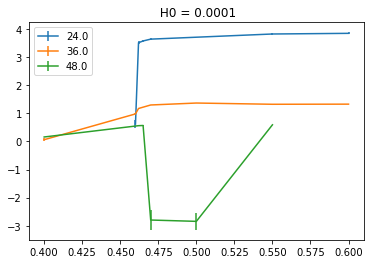

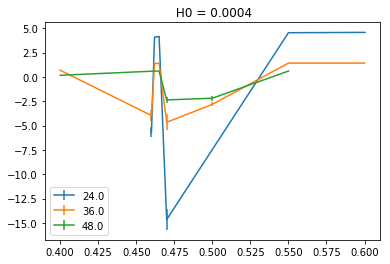

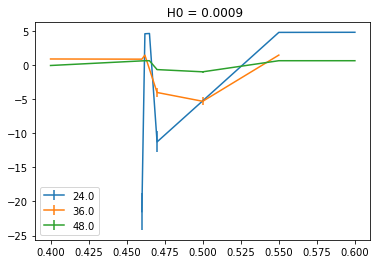

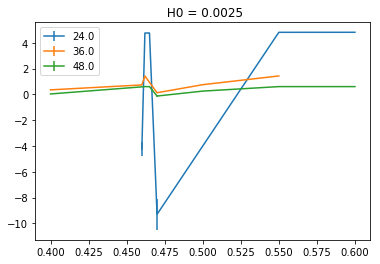

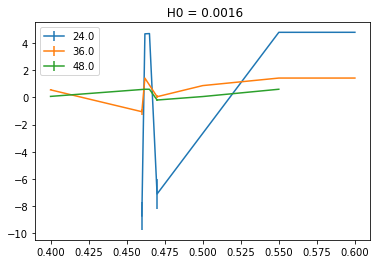

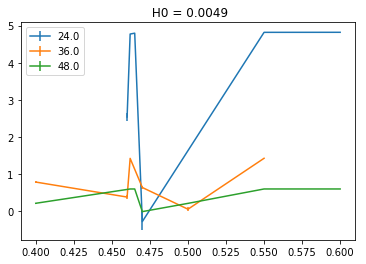

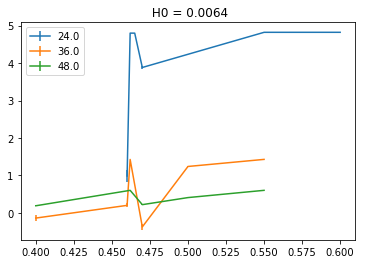

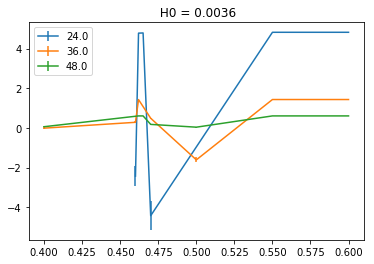

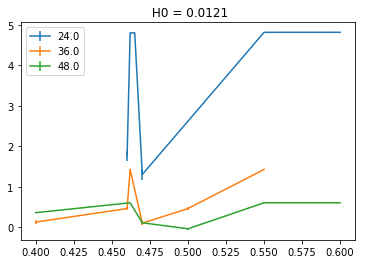

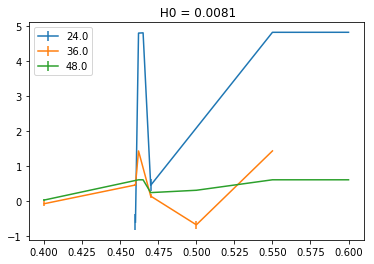

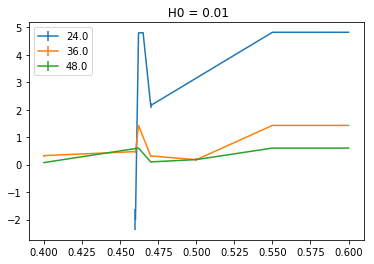

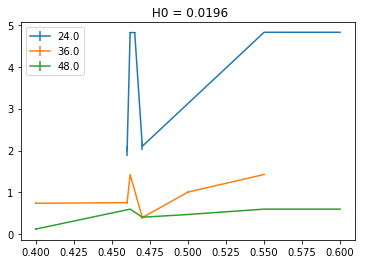

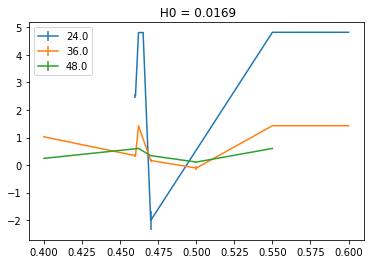

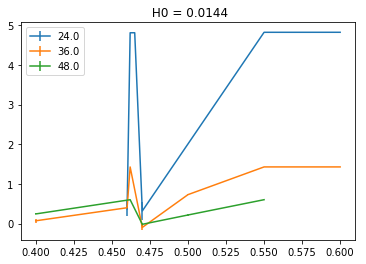

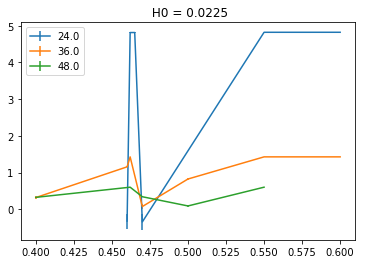

In [173]:
for H0 in H0_list:
    plt.figure()
    for L in binder_data.keys():
        if H0 in binder_data[L].keys():
            Y=[i*1e5 for i in binder_data[L][H0]['bc']]
            Y_err=[i*1e5 for i in binder_data[L][H0]['bc_err']]
            X=[i for i in binder_data[L][H0]['J']]
            N=argsort(X)
            X2=[X[i] for i in N]
            Y2=[Y[i] for i in N]
            Y2_err=[Y_err[i] for i in N]
            plt.errorbar(X2,Y2,Y2_err,label =str(L))
    plt.legend(loc=0)
    plt.title(' H0 = '+str(H0))

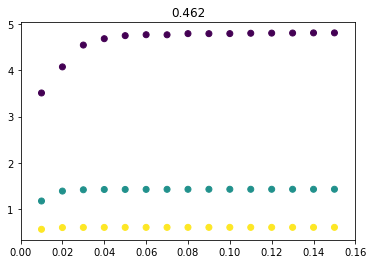

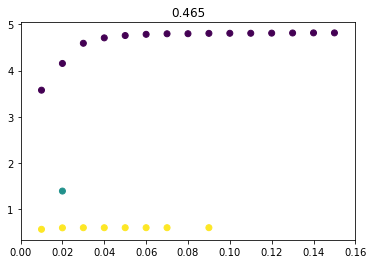

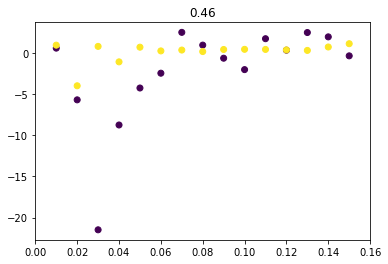

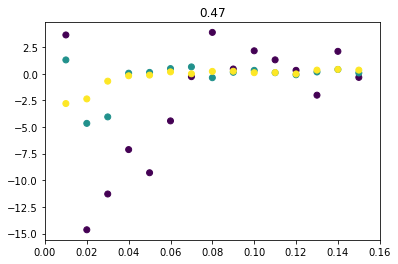

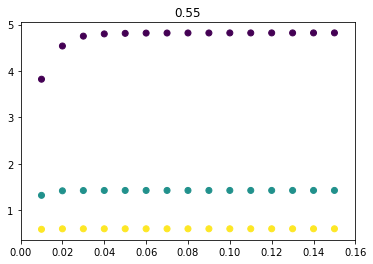

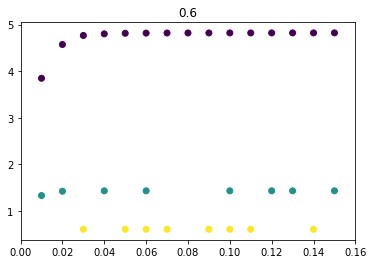

In [169]:
# plt.figure(figsize=(10,10))
i=0
X_fit=[]
Y_fit=[]
# f,ax=plt.subplots(ncols=3,nrows=1)
# axis={24:ax[0],36:ax[1],48:ax[2]}

for J in analyzed_vals[24].keys():
    plt.figure()
    X=[]
    Y=[]
    Y_err=[]
    col=[]
    k=0
    for L in [24,36,48]:
        k+=1
        if J not in analyzed_vals[L].keys():
            continue
        for H0 in analyzed_vals[L][J].keys():
            X.append(sqrt(H0))
            Y.append(analyzed_vals[L][J][H0]['M0_Bc']*1e5)
            Y_err.append(analyzed_vals[L][J][H0]['M0_Bc_err']*1e5)
            col.append(k)
            
    i+=1
    plt.title(str(J))
    plt.scatter(X,Y,c=col) 
    plt.xlim([0,0.16]) 
#     plt.legend(loc=0)

## Phase and time history analysis @ Meeting

In [26]:
dat=get_data_xyModel(fnames[0])

In [28]:
tag_name='N16_RG_sbf_MIX'
BASE_FOLDER='../simulation_data/raw/'+tag_name+'/'
f=open(BASE_FOLDER+"fnames.txt",'r')
fnames=[]
l=f.readline()
while l:
    fnames.append(BASE_FOLDER+l[:-1])
    l=f.readline()
f.close()
print("Files to be analyzed : " ,len(fnames))

Files to be analyzed :  8


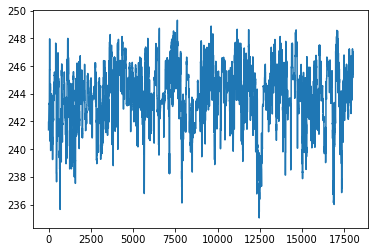

In [31]:
datMCS=get_data_xyModel(fnames[1])
n0=0
n=-1
plt.plot(datMCS['time'][n0:n],datMCS['magentization'][n0:n])

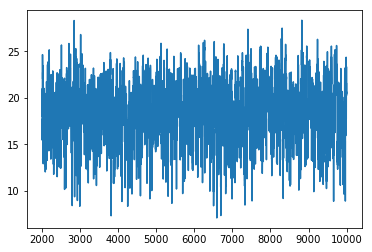

In [79]:
datW=get_data_xyModel(fnames[0])
n0=2000
n=10000
plt.plot(datW['time'][n0:n],datW['energy'][n0:n])

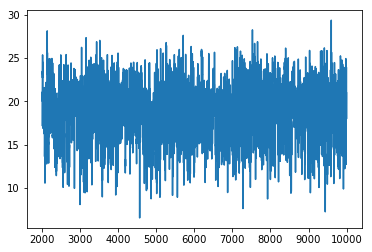

In [83]:
datMIX=get_data_xyModel(fnames[0])
n0=2000
n=10000
plt.plot(datMIX['time'][n0:n],datMIX['energy'][n0:n])

In [67]:
ang=[i*2*pi/400-pi for i in range(400)]
c4=[cos(4*i) for i in ang]
c8=[cos(8*i) for i in ang]

In [68]:
a=0.06
b=0.15

(-0.7853981633974483, 0.7853981633974483)

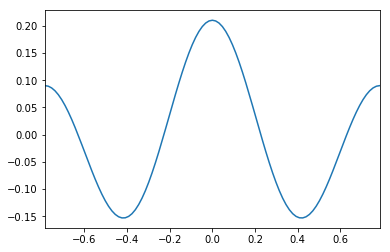

In [69]:
x=ang
y=[a*i+b*j for i,j in zip(c4,c8)]
plt.plot(x,y)
plt.xlim([-pi/4,pi/4])

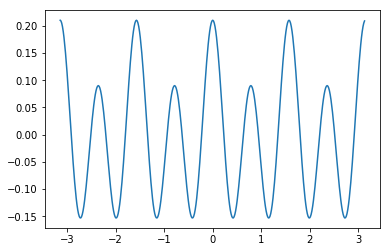

In [70]:
plt.plot(x,y)

In [105]:
tag_name='N08_xy'
BASE_FOLDER='../simulation_data/raw/'+tag_name+'/'
f=open(BASE_FOLDER+"fnames.txt",'r')
fnames=[]
l=f.readline()
while l:
    fnames.append(BASE_FOLDER+l[:-1])
    l=f.readline()
f.close()
print("Files to be analyzed : " ,len(fnames))

Files to be analyzed :  15


In [106]:
 dat=get_data_xyModel(fnames[0]);

In [84]:
fnames

['../simulation_data/raw/N08_xy/L_8_T_0.250_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_0.370_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_0.490_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_0.610_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_0.730_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_0.850_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_0.970_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_1.090_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_1.210_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_1.330_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_1.450_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_1.570_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_1.690_J_1.000_

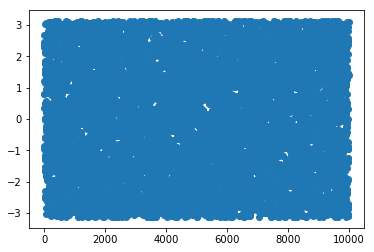

In [107]:
n0=0
n=10000
phase_hist=[arctan2(j,i) for i,j in zip(dat['magentization_x'][n0:n],dat['magentization_y'][n0:n])]
plt.scatter(dat['time'][n0:n],phase_hist)

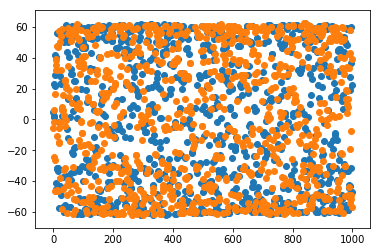

In [85]:
n0=0
n=1000
plt.scatter(dat['time'][n0:n],dat['magentization_y'][n0:n])
# plt.figure()
plt.scatter(dat['time'][n0:n],dat['magentization_x'][n0:n])

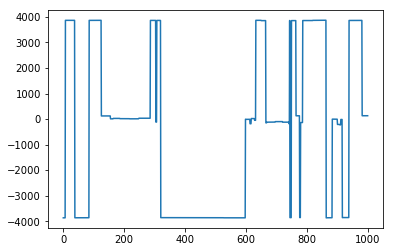

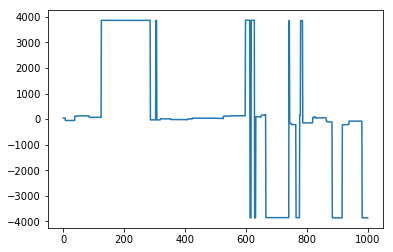

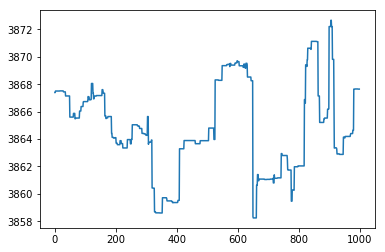

In [91]:
n0=0
n=1000
plt.plot(dat['time'][n0:n],dat['magentization_y'][n0:n])
plt.figure()
plt.plot(dat['time'][n0:n],dat['magentization_x'][n0:n])
plt.figure()
plt.plot(dat['time'][n0:n],dat['magentization'][n0:n])
